In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import missingno as msno
import openpyxl
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
#%matplotlib inline
#from utility import utils as u
os.chdir("C:\\src\\")
from utility import utils as u

In [2]:
import sklearn
import urllib.request
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
os.chdir("C:\\src\\data\\raw\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\data\\raw'

In [4]:
# Cargamos los ficheros originales 

In [4]:
df1,dr1=u.cargar_fichero("FIFA18_official_data.csv","17-18.csv","01/09/2018")
df2,dr2=u.cargar_fichero("FIFA19_official_data.csv","18-19.csv","01/09/2019")
df3,dr3=u.cargar_fichero("FIFA20_official_data.csv","19-20.csv","01/09/2020")
df4,dr4=u.cargar_fichero("FIFA21_official_data.csv","20-21.csv","01/09/2021")
df5,dr5=u.cargar_fichero("FIFA22_official_data.csv","21-22.csv","01/09/2022")
data_Fifa, data_Real=u.conc_1(df1,df2,df3,df4,dr1,dr2,dr3,dr4)

In [6]:
data_Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70082 entries, 0 to 17107
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        70082 non-null  int64         
 1   Name                      70082 non-null  object        
 2   Age                       70082 non-null  int64         
 3   Photo                     70082 non-null  object        
 4   Nationality               70082 non-null  object        
 5   Flag                      70082 non-null  object        
 6   Overall                   70082 non-null  int64         
 7   Potential                 70082 non-null  int64         
 8   Club                      68879 non-null  object        
 9   Club Logo                 70082 non-null  object        
 10  Value                     70082 non-null  object        
 11  Wage                      70082 non-null  object        
 12  Special           

In [7]:
data_Fifa["Value"] = data_Fifa["Value"].str.replace('€',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('M',"")
data_Fifa["Value"] = data_Fifa["Value"].str.replace('K',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('€',"")
data_Fifa["Wage"] = data_Fifa["Wage"].str.replace('K',"")
data_Fifa["Weight"] = data_Fifa["Weight"].str.replace('lbs',"")
data_Fifa["Weight"] = data_Fifa["Weight"].astype(float)

In [8]:
data_Fifa['Weight']= data_Fifa['Weight'] * 0.453592

In [11]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace("'",".")

In [12]:
data_Fifa["Height"]

0         6.0
1         5.9
2         5.8
3        5.11
4         6.3
         ... 
17103     6.4
17104     6.5
17105     6.3
17106     6.1
17107     6.0
Name: Height, Length: 70082, dtype: object

In [13]:
data_Fifa["Height"] = data_Fifa["Height"].str.replace('lbs',"")
data_Fifa["Height"] = data_Fifa["Height"].str.replace('cm',"")
new = data_Fifa["Height"].str.split(".", n= 1, expand=True)
data_Fifa["Foot"]=new[0]
data_Fifa["inc"]=new[1]


In [14]:
new[1]

0         0
1         9
2         8
3        11
4         3
         ..
17103     4
17104     5
17105     3
17106     1
17107     0
Name: 1, Length: 70082, dtype: object

In [15]:
data_Fifa["Height"] = data_Fifa["Height"].astype(float)
data_Fifa["Foot"]=data_Fifa["Foot"].astype(float)
data_Fifa["inc"]=data_Fifa["inc"].astype(float)

In [12]:
data_Fifa["Foot"]=data_Fifa["Foot"]*12
data_Fifa["inc"]=data_Fifa["inc"]*2.54

In [13]:
data_Fifa["Height"]= data_Fifa["Foot"] + data_Fifa["inc"]

In [14]:
df5["Weight"] = df5["Weight"].str.replace('kg',"")
df5["Height"] = df5["Height"].str.replace('cm',"")

In [15]:
df5["Value"] = df5["Value"].str.replace('$',"")
df5["Value"] = df5["Value"].str.replace('M',"")
df5["Value"] = df5["Value"].str.replace('€',"")
df5["Value"] = df5["Value"].str.replace('K',"")

In [16]:
df5["Wage"] = df5["Wage"].str.replace('€',"")
df5["Wage"] = df5["Wage"].str.replace('K',"")
df5["Wage"] = df5["Wage"].str.replace('M',"")

In [17]:
df5.shape

(16710, 67)

In [18]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,40.0,56.0,GK,49.0,€120K,2021-01-09,1,NaN,72.0,10.16
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,42.0,57.0,GK,51.0,€83K,2021-01-09,1,5.0,72.0,12.70
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,53.0,55.0,GK,51.0,€149K,2021-01-09,1,8.0,72.0,7.62
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,50.0,51.0,GK,49.0,€94K,2021-01-09,1,8.0,72.0,2.54


In [19]:
df5

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year,Orden
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2022-01-09,1
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2022-01-09,1
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2022-01-09,1
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2022-01-09,1
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2022-01-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN,2022-01-09,1
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0,2022-01-09,1
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0,2022-01-09,1
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0,2022-01-09,1


In [20]:
data_Fifa, data_Real=u.c5(data_Fifa,df5,data_Real,dr5)

In [21]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year,Orden,DefensiveAwareness,Foot,inc
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,33.0,37.0,CF,88.0,€198.9M,2018-01-09,1,NaN,72.0,0.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,8.0,11.0,CDM,84.0,€72.3M,2018-01-09,1,NaN,60.0,22.86
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,10.0,CF,81.0,€37.3M,2018-01-09,1,NaN,60.0,20.32
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,9.0,LB,82.0,€66.4M,2018-01-09,1,NaN,60.0,27.94
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,4.0,3.0,CM,85.0,€146.3M,2018-01-09,1,NaN,72.0,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,50.0,59.0,GK,52.0,€238K,2022-01-09,1,NaN,NaN,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,48.0,58.0,GK,53.0,€279K,2022-01-09,1,5.0,NaN,NaN
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,38.0,52.0,GK,47.0,€223K,2022-01-09,1,21.0,NaN,NaN
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,45.0,49.0,GK,47.0,€259K,2022-01-09,1,7.0,NaN,NaN


In [22]:
data_Real=u.limpiar_dataframe(data_Real)
data_Fifa=u.limpiar_dataframe2(data_Fifa)
data_Fifa=u.cambios_nombre(data_Fifa)
data_Real, data_Fifa, pais1, pais2, pais3, pais4, pais5=u.equipo_anyo(data_Fifa,data_Real)
data_Fifa =u.liga(pais1,data_Fifa,"2018-01-09")
data_Fifa =u.liga(pais2,data_Fifa,"2019-01-09")
data_Fifa =u.liga(pais3,data_Fifa,"2020-01-09")
data_Fifa =u.liga(pais4,data_Fifa,"2021-01-09")
data_Fifa =u.liga(pais5,data_Fifa,"2022-01-09")
data_Fifa, data_Real=u.modificar_dataframe(data_Fifa, data_Real)

In [23]:
data_Fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,...,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY,TOT
0,L. Suárez,30,Uruguay,92,92,Barcelona,97,500,2321,Right,...,72.0,0.00,ESP,82.5,88.666667,79.666667,86.500000,46.2,82.00,77.588889
1,R. Nainggolan,29,Belgium,86,86,Roma,42.5,130,2286,Right,...,60.0,22.86,ITA,78.0,78.666667,75.833333,83.500000,79.4,83.50,79.816667
2,A. Florenzi,26,Italy,82,83,Roma,21,70,2267,Right,...,60.0,20.32,ITA,85.0,80.833333,77.000000,82.166667,75.6,77.75,79.725000
3,D. Alaba,25,Austria,85,87,Bayern Munich,38.5,130,2263,Left,...,60.0,27.94,GER,83.5,75.666667,80.666667,80.166667,79.8,76.75,79.425000
4,P. Pogba,24,France,88,92,Manchester Utd,76,250,2262,Right,...,72.0,7.62,ENG,76.5,81.500000,84.833333,81.000000,69.4,86.25,79.913889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,N. Sauter,18,Germany,56,69,Freiburg,300,500,842,Right,...,NaN,NaN,GER,27.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16662,V. Sinisalo,19,Finland,55,70,Aston Villa,250,2,841,Right,...,NaN,NaN,ENG,23.0,0.000000,0.000000,0.000000,0.0,0.00,50.333333
16676,L. Philipp,20,Germany,60,72,Hoffenheim,525,2,831,Right,...,NaN,NaN,GER,26.5,0.000000,0.000000,0.000000,0.0,0.00,53.750000
16690,P. Zovko,19,Bosnia and Herzegovina,58,73,Spezia,425,850,816,Left,...,NaN,NaN,ITA,20.0,0.000000,0.000000,0.000000,0.0,0.00,52.500000


In [24]:
# Calcular por equipo y año el valor medio de la plantilla, sumando las cartas totales y dividiendolo por numero de jugadores, para cada equipo y cada liga. 
#data_medias=data_Fifa.groupby(by=["Club","Year","Pais"]).mean()  
# data_medias=data_Fifa.groupby(by=["Club","Year"]).mean()  
data_medias=data_Fifa[data_Fifa.Pais == "ESP"].groupby(by=["Club","Year"]).mean()

In [25]:
#Exportar
data_Fifa, data_Real, data_medias, data_medidas_1=u.exportar(data_Fifa, data_Real)
u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

***HASTA AQUI DEBERIA ESTAR TODO EN FUNCIONES ***

In [26]:
data_Fifa2=data_Fifa

**MINI EDA*** 

## Comprobamos si existen nulos

In [27]:
data_Fifa2.describe(include='all')

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Foot,...,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY,TOT
count,14198,14198.000000,14198,14198.000000,14198.000000,14198,14198,14198,14198.000000,14198,...,11175.000000,11175.000000,14198,14198.000000,14171.000000,14171.000000,14012.000000,14171.000000,14171.000000,14012.000000
unique,8517,NaN,129,NaN,NaN,114,270,157,NaN,2,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Danilo,NaN,Spain,NaN,NaN,Paris S-G,5.5,20,NaN,Right,...,NaN,NaN,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,2423,NaN,NaN,320,351,959,NaN,10581,...,NaN,NaN,3468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.838287,NaN,71.824412,77.415622,NaN,NaN,NaN,1714.130230,NaN,...,66.542819,13.082307,NaN,65.771447,51.161551,53.686719,60.417273,50.773044,59.159728,63.233369
std,NaN,4.994374,NaN,7.819012,5.566128,NaN,NaN,NaN,298.527923,NaN,...,5.975663,10.537840,NaN,14.396145,22.355689,22.006033,22.984775,24.023135,22.736112,7.414984
min,NaN,16.000000,NaN,38.000000,55.000000,NaN,NaN,NaN,755.000000,NaN,...,60.000000,0.000000,NaN,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.561111
25%,NaN,21.000000,NaN,66.000000,74.000000,NaN,NaN,NaN,1538.000000,NaN,...,60.000000,2.540000,NaN,58.000000,40.500000,47.500000,58.666667,35.400000,56.250000,57.418750


<AxesSubplot:>

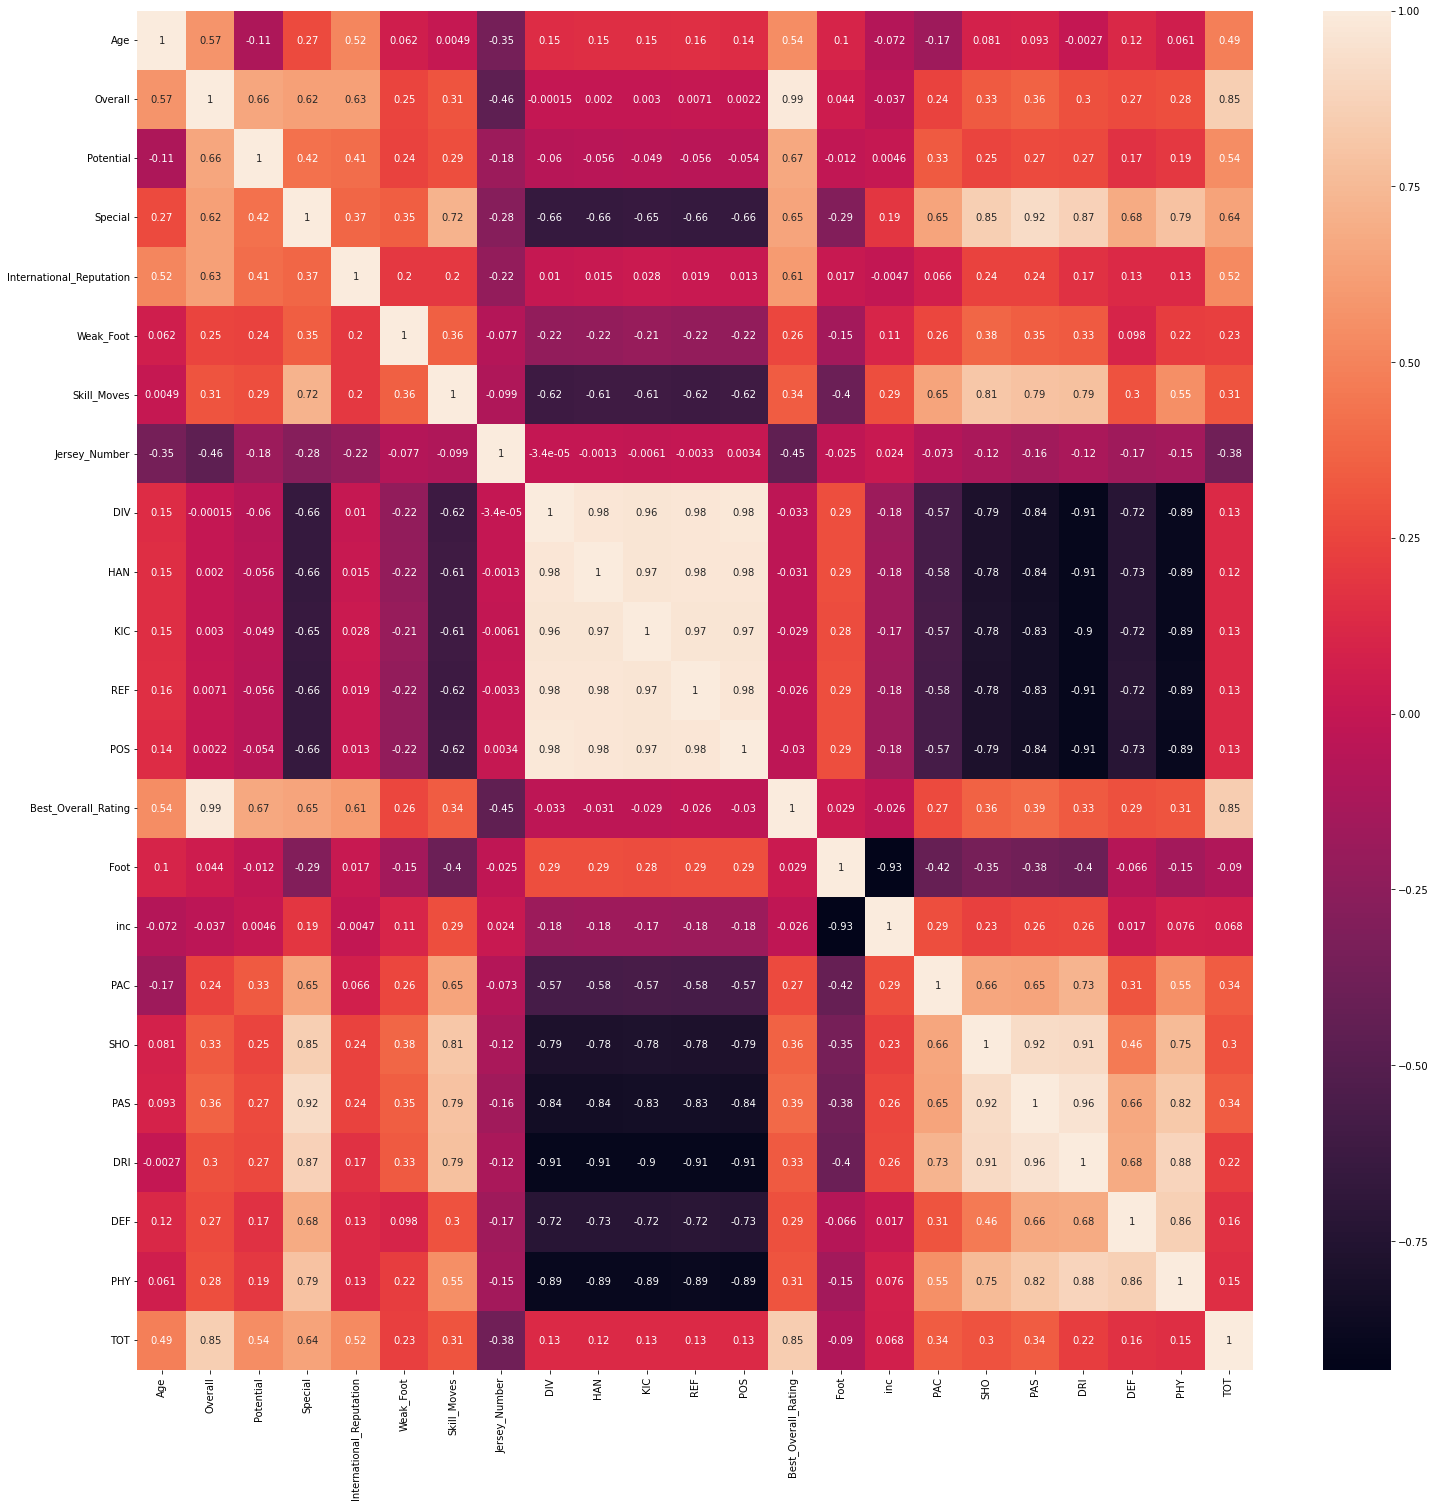

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(data_Fifa2.corr(), annot=True)

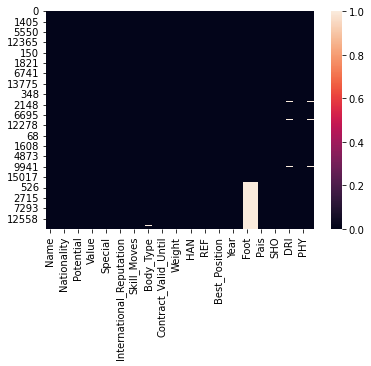

In [29]:
#Analizamos datos vemos las columnas que contienen nulos y adaptamos lo que necesitamos , ver memoria
sns.heatmap(data_Fifa2.isnull(),cbar=True);

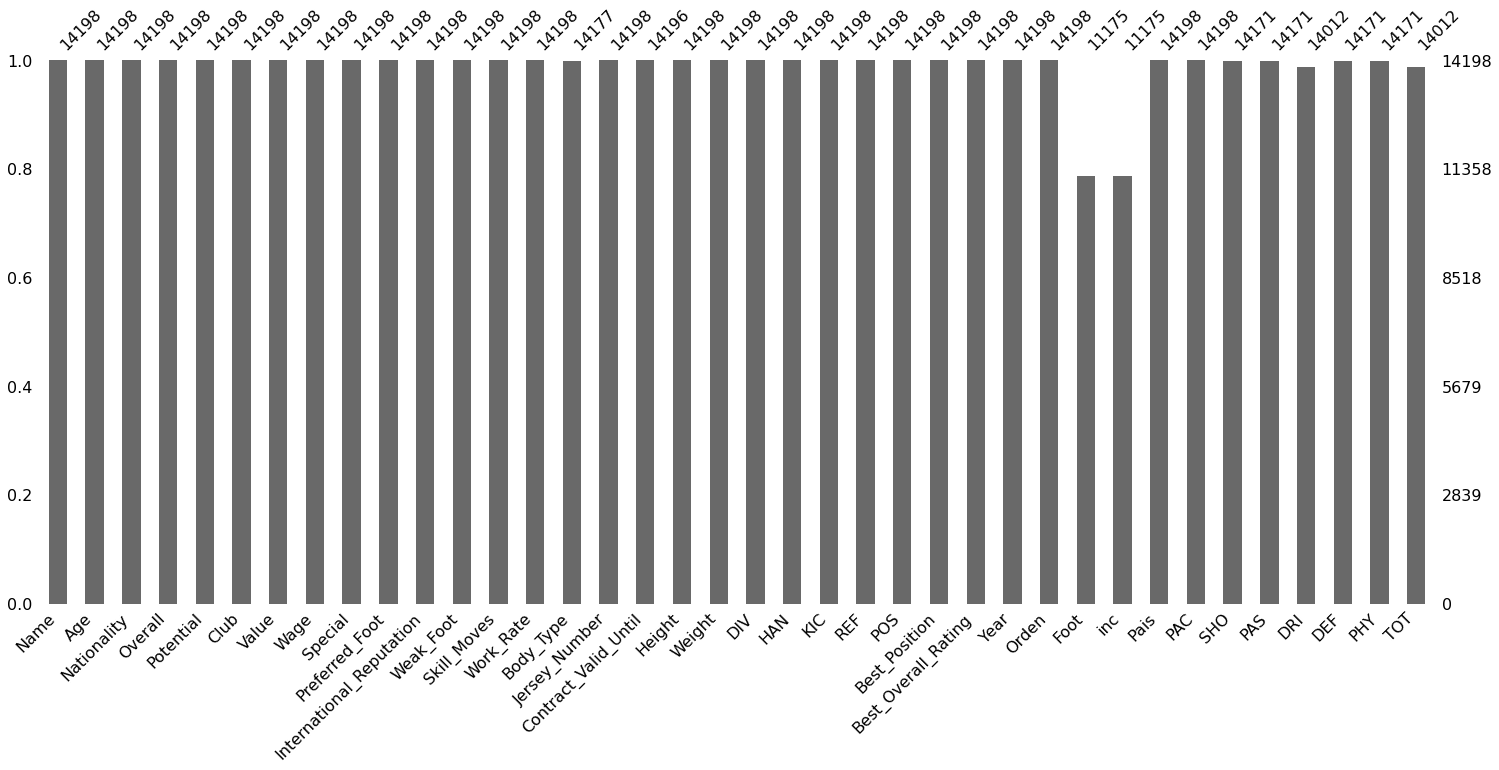

In [30]:
msno.bar(data_Fifa2);

In [31]:
data_Fifa2.isna().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred_Foot                 0
International_Reputation       0
Weak_Foot                      0
Skill_Moves                    0
Work_Rate                      0
Body_Type                     21
Jersey_Number                  0
Contract_Valid_Until           2
Height                         0
Weight                         0
DIV                            0
HAN                            0
KIC                            0
REF                            0
POS                            0
Best_Position                  0
Best_Overall_Rating            0
Year                           0
Orden                          0
Foot                        3023
inc                         3023
Pais      

## Eliminamos nulos asignando los valores de las medias de cada variable

In [32]:
data_Fifa2=data_Fifa2.fillna(data_Fifa2.mean())

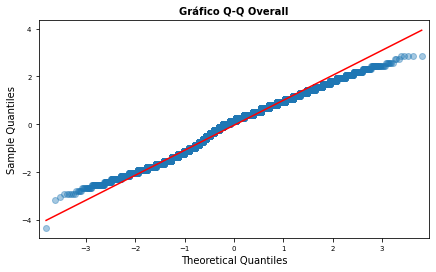

In [33]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa2["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

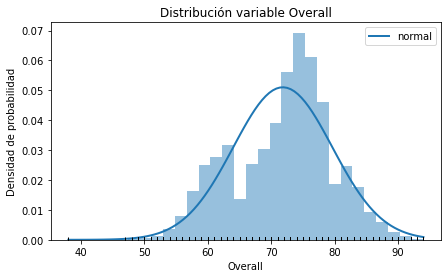

In [34]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa2["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa2["Overall"]), max(data_Fifa2["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa2["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa2["Overall"], np.full_like(data_Fifa2["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [35]:
# Probamos si la muestra difiere de una distribución normal.

In [36]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa2.Overall);
shapiro_test

ShapiroResult(statistic=0.9812974333763123, pvalue=2.905889441051945e-39)

In [37]:
# Diagramas de cajas 

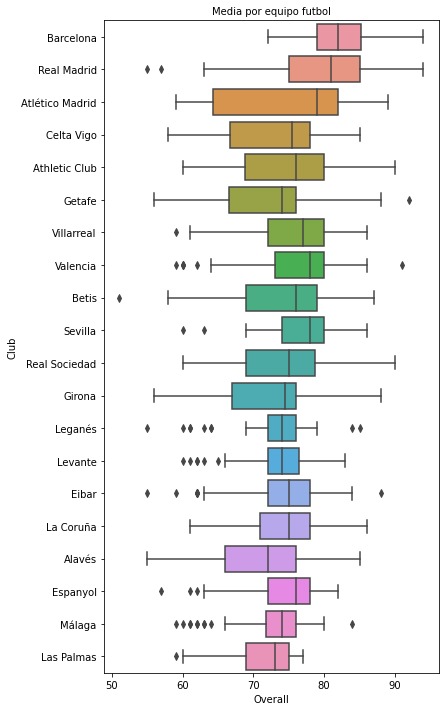

In [38]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Media por equipo futbol', fontsize=10)
plt.ylabel('Club', fontsize=10)
plt.xlabel('Overall', fontsize=10)
sns.boxplot(y=data_Fifa2.Club[(data_Fifa2.Pais=="ESP")&(data_Fifa.Year=="2018-01-09")], x=data_Fifa2["Overall"]);

Cuadrado de relacion y algo mas de EDA ver pycaret

*** PREPARACION DE DATOS PARA EL MODELO DE ML ***


## Eliminamos variables que no aportan nada al modelo y creamos copia del dataframe original

In [39]:
data_Fifa2=data_Fifa.drop(["Name","Nationality","Club","Body_Type","Year","Orden","Pais","Foot","inc","Contract_Valid_Until","Jersey_Number"], axis =1)

## Revisamos el formato de las variables y convertimos las variables que nos interesan de objeto a float

In [40]:
data_Fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14198 entries, 0 to 16691
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14198 non-null  int64  
 1   Overall                   14198 non-null  int64  
 2   Potential                 14198 non-null  int64  
 3   Value                     14198 non-null  object 
 4   Wage                      14198 non-null  object 
 5   Special                   14198 non-null  int64  
 6   Preferred_Foot            14198 non-null  object 
 7   International_Reputation  14198 non-null  float64
 8   Weak_Foot                 14198 non-null  float64
 9   Skill_Moves               14198 non-null  float64
 10  Work_Rate                 14198 non-null  object 
 11  Height                    14198 non-null  object 
 12  Weight                    14198 non-null  object 
 13  DIV                       14198 non-null  float64
 14  HAN   

In [41]:
data_Fifa2["Wage"]=data_Fifa2["Wage"].astype(float)

In [42]:
data_Fifa2["Value"]=data_Fifa2["Value"].astype(float)

In [43]:
data_Fifa2["Height"]=data_Fifa2["Height"].astype(float)

In [44]:
data_Fifa2["Weight"]=data_Fifa2["Weight"].astype(float)

# Vemos los valores unicos por variables , para decidir si usamos dummies o similar

In [45]:
for i in data_Fifa2.columns:
    print(f'la columna {i} tiene {data_Fifa2[i].nunique()} valores únicos',{data_Fifa2[i].dtype})


la columna Age tiene 28 valores únicos {dtype('int64')}
la columna Overall tiene 49 valores únicos {dtype('int64')}
la columna Potential tiene 40 valores únicos {dtype('int64')}
la columna Value tiene 270 valores únicos {dtype('float64')}
la columna Wage tiene 157 valores únicos {dtype('float64')}
la columna Special tiene 1415 valores únicos {dtype('int64')}
la columna Preferred_Foot tiene 2 valores únicos {dtype('O')}
la columna International_Reputation tiene 5 valores únicos {dtype('float64')}
la columna Weak_Foot tiene 5 valores únicos {dtype('float64')}
la columna Skill_Moves tiene 5 valores únicos {dtype('float64')}
la columna Work_Rate tiene 10 valores únicos {dtype('O')}
la columna Height tiene 59 valores únicos {dtype('float64')}
la columna Weight tiene 94 valores únicos {dtype('float64')}
la columna DIV tiene 68 valores únicos {dtype('float64')}
la columna HAN tiene 72 valores únicos {dtype('float64')}
la columna KIC tiene 74 valores únicos {dtype('float64')}
la columna REF ti

In [46]:
data_Fifa2["Work_Rate"]

0          High/ Medium
1            High/ High
2          High/ Medium
3          High/ Medium
4             High/ Low
              ...      
16661    Medium/ Medium
16662    Medium/ Medium
16676    Medium/ Medium
16690    Medium/ Medium
16691    Medium/ Medium
Name: Work_Rate, Length: 14198, dtype: object

In [47]:
data_Fifa2["Preferred_Foot"]

0        Right
1        Right
2        Right
3         Left
4        Right
         ...  
16661    Right
16662    Right
16676    Right
16690     Left
16691    Right
Name: Preferred_Foot, Length: 14198, dtype: object

Antes de categorizar separamos por posicion en campo 

In [48]:
# Separar porteros de jugadores , arreglar los dataframes, eliminando las varibles que no corresponden al tipo de jugador
data_Fifa_GK=data_Fifa2[(data_Fifa2['Best_Position'] == "GK")]

In [49]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_GK=data_Fifa_GK.drop(["PAS","SHO","PHY","DRI","DEF"], axis =1)

In [50]:
data_Fifa_FOT=data_Fifa_GK.drop(["Best_Position"], axis =1)

# categorizamos las variables objetos

In [51]:
# We convert Categorical to boolean for first dataset
categorical_feature = (data_Fifa_GK.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_GK.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_GK = pd.get_dummies(data_Fifa_GK, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )


# normalizamos las variables numericas para que esten todas a escala, exceptuando overall

In [52]:
# Min-Max Normalization
data_Fifa2_1 = data_Fifa_GK.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_GK.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_GK["Overall"]

data_Fifa_FOT=data_Fifa2_norm

In [53]:
data_Fifa_GK=data_Fifa_GK.fillna(data_Fifa_GK.mean())

In [54]:
data_Fifa_GK

,Age,Overall,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,...,DIV,HAN,KIC,REF,POS,Best_Overall_Rating,PAC,TOT,Preferred_Foot_Right,Work_Rate_N/A/ N/A
12712,31,92,92,61.0,225.0,1487,5.0,4.0,1.0,82.16,...,91.0,90.0,95.0,91.0,89.0,90.0,58.0,85.666667,1,0
13152,26,91,93,74.5,300.0,1465,4.0,3.0,1.0,82.16,...,90.0,85.0,87.0,88.0,93.0,89.0,57.5,83.416667,1,0
13435,34,80,80,6.0,100.0,1451,3.0,3.0,1.0,72.00,...,79.0,80.0,86.0,76.0,79.0,78.0,56.0,76.000000,1,0
13691,23,85,89,36.0,110.0,1437,2.0,3.0,1.0,77.08,...,83.0,80.0,90.0,81.0,87.0,83.0,63.5,80.750000,0,0
14800,23,80,86,15.0,70.0,1368,1.0,3.0,1.0,74.54,...,77.0,79.0,86.0,76.0,84.0,79.0,45.5,74.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,18,56,69,300.0,500.0,842,1.0,2.0,1.0,190.00,...,59.0,54.0,52.0,49.0,61.0,56.0,27.0,50.333333,1,0
16662,19,55,70,250.0,2.0,841,1.0,2.0,1.0,196.00,...,57.0,54.0,57.0,51.0,60.0,55.0,23.0,50.333333,1,0
16676,20,60,72,525.0,2.0,831,1.0,2.0,1.0,192.00,...,60.0,58.0,56.0,59.0,63.0,60.0,26.5,53.750000,1,0
16690,19,58,73,425.0,850.0,816,1.0,2.0,1.0,192.00,...,55.0,59.0,60.0,55.0,66.0,58.0,20.0,52.500000,0,0


In [55]:
#data_Fifa_GK_, data_Fifa_FOT=u.exportar(data_Fifa, data_Real)  # marcar la lineas 1 y 2 de la funcion exportar en utility

In [56]:
data_Fifa_GK.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Height',
       'Weight', 'DIV', 'HAN', 'KIC', 'REF', 'POS', 'Best_Overall_Rating',
       'PAC', 'TOT', 'Preferred_Foot_Right', 'Work_Rate_N/A/ N/A'],
      dtype='object')

In [57]:
data_Fifa_GK.to_csv("my_model_GK.csv", sep=',', encoding="utf-8", index=False)

*** ENTRENAMIENTO DEL MODELO ***  Falta para los porteros, ojo

In [58]:
train=data_Fifa_GK

In [59]:
#Exportar
train.to_csv("my_model.csv", sep=',', encoding="utf-8", index=False)
#u.conv_xlsx("data_Fifa.csv","data_Real.csv","data_medias.csv","data_medidas.csv")

In [60]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(1562, 20)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [62]:
X_train

,Age,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Height,Weight,DIV,HAN,KIC,REF,POS,Best_Overall_Rating,PAC,TOT,Preferred_Foot_Right,Work_Rate_N/A/ N/A
16919,19,68,120.0,500.0,882,1.0,2.0,1.0,77.08,82.100152,55.0,56.0,53.0,52.0,59.0,54.0,22.0,49.500000,1,0
13109,27,85,33.0,83.0,1495,3.0,4.0,1.0,185.00,77.000000,83.0,78.0,87.0,80.0,86.0,83.0,48.5,77.083333,0,0
16155,32,64,275.0,6.0,1097,1.0,3.0,1.0,79.62,89.811216,64.0,61.0,62.0,64.0,65.0,64.0,32.5,58.083333,1,0
14857,26,80,16.5,44.0,1342,1.0,3.0,1.0,189.00,77.000000,80.0,79.0,72.0,80.0,82.0,80.0,48.5,73.583333,0,0
16722,20,64,325.0,7.0,915,1.0,2.0,1.0,72.00,74.842680,70.0,63.0,55.0,59.0,65.0,62.0,32.5,57.416667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16388,22,75,950.0,5.0,1067,1.0,2.0,1.0,77.08,78.925008,69.0,63.0,65.0,66.0,70.0,68.0,32.5,60.916667,1,0
15196,33,79,5.5,28.0,1266,3.0,3.0,1.0,188.00,93.000000,80.0,79.0,74.0,78.0,79.0,79.0,47.5,72.916667,1,0
16724,18,72,180.0,750.0,915,1.0,3.0,1.0,77.08,78.925008,59.0,56.0,57.0,56.0,58.0,57.0,34.5,53.416667,1,0
16119,18,81,1.7,500.0,1057,1.0,3.0,1.0,183.00,77.000000,65.0,64.0,63.0,66.0,67.0,66.0,42.0,61.166667,1,0


*** MODELOS REGRESION LINEAL *** 

*** METRICAS DE CADA MODELO MAE MSE MSQE**


# Modelos sin parametros, con valores por defecto, sacamos df con valores :
# Modelo MAE MSE RMSE

**Linear Reggression**

mean_absolute_error(y_test,prediction)

In [63]:
#!pip install xgboost

In [64]:
#!pip install lightgbm

In [65]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb

In [66]:
import math
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#baseline_error = mean_squared_error(y_test,lr.predict(X_test))

MAE_lr=mean_absolute_error(y_test, lr.predict(X_test))
MSE_lr=mean_squared_error(y_test, lr.predict(X_test))
RMSE_lr=np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

MAE test 0.3259446765329511
MSE test 0.16703194132532032
RMSE test 0.40869541387850233


Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

In [69]:
#lasso = Lasso(alpha=6000)
lasso = Lasso()
lasso.fit(X_train, y_train)

MAE_lasso=mean_absolute_error(y_test, lasso.predict(X_test))
MSE_lasso=mean_squared_error(y_test, lasso.predict(X_test))
RMSE_lasso=np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MAE test 0.3503336719852337
MSE test 0.2106858659903517
RMSE test 0.4590053006124784


Ridge Regression

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
ridge = Ridge()
ridge.fit(X_train, y_train)

MAE_ridge=mean_absolute_error(y_test, ridge.predict(X_test))
MSE_ridge=mean_squared_error(y_test, ridge.predict(X_test))
RMSE_ridge=np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 0.3247450017186687
MSE test 0.16663107109977196
RMSE test 0.4082046926479067


Elastic net

In [72]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [73]:
#elastic = ElasticNet(alpha=72, l1_ratio=0.99)
elastic = ElasticNet()
elastic.fit(X_train, y_train)

MAE_elastic=mean_absolute_error(y_test, elastic.predict(X_test))
MSE_elastic=mean_squared_error(y_test, elastic.predict(X_test))
RMSE_elastic=np.sqrt(mean_squared_error(y_test, elastic.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MAE test 0.35373417305438287
MSE test 0.21323532709663495
RMSE test 0.46177410830040583


*** LARS

In [74]:
from numpy import sqrt
from sklearn import linear_model
from sklearn.linear_model import Lars

In [75]:
lars= Lars()
lars.fit(X_train, y_train)

MAE_lars=mean_absolute_error(y_test, lars.predict(X_test))
MSE_lars=mean_squared_error(y_test, lars.predict(X_test))
RMSE_lars=np.sqrt(mean_squared_error(y_test, lars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lars.predict(X_test))))

MAE test 0.3259446765329472
MSE test 0.1670319413253168
RMSE test 0.408695413878498


RandomForest

In [76]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

MAE_rf=mean_absolute_error(y_test, rf.predict(X_test))
MSE_rf=mean_squared_error(y_test, rf.predict(X_test))
RMSE_rf=np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE test', mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

MAE test 0.3436741214057507
MSE test 0.21302140575079864
RMSE test 0.46154242031561804


Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)

MAE_gnb=mean_absolute_error(y_test, gnb.predict(X_test))
MSE_gnb=mean_squared_error(y_test, gnb.predict(X_test))
RMSE_gnb=np.sqrt(mean_squared_error(y_test, gnb.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gnb.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gnb.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gnb.predict(X_test))))

MAE test 0.402555910543131
MSE test 0.5111821086261981
RMSE test 0.7149700054031624


Llar

In [79]:
lassolars = linear_model.LassoLars()
lassolars.fit(X_train, y_train).predict(X_test)

MAE_lassolars=mean_absolute_error(y_test, lassolars.predict(X_test))
MSE_lassolars=mean_squared_error(y_test, lassolars.predict(X_test))
RMSE_lassolars=np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lassolars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lassolars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test))))

MAE test 7.300506219672225
MSE test 75.35854417706169
RMSE test 8.68092991430421


Omp

In [80]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [81]:
omp = OrthogonalMatchingPursuit()
omp.fit(X_train, y_train).predict(X_test)

MAE_omp=mean_absolute_error(y_test, omp.predict(X_test))
MSE_omp=mean_squared_error(y_test, omp.predict(X_test))
RMSE_omp=np.sqrt(mean_squared_error(y_test, omp.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, omp.predict(X_test)))
print('MSE test', mean_squared_error(y_test, omp.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, omp.predict(X_test))))

MAE test 0.471298867340036
MSE test 0.294303775442989
RMSE test 0.5424977192974999


Bayesian ridge

In [82]:
from sklearn.linear_model import BayesianRidge

In [83]:
br = BayesianRidge()
br.fit(X_train, y_train).predict(X_test)

MAE_br=mean_absolute_error(y_test, br.predict(X_test))
MSE_br=mean_squared_error(y_test, br.predict(X_test))
RMSE_br=np.sqrt(mean_squared_error(y_test, br.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, br.predict(X_test)))
print('MSE test', mean_squared_error(y_test, br.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, br.predict(X_test))))

MAE test 0.3240507604967852
MSE test 0.166509488180224
RMSE test 0.4080557415111617


Automatic Relevance Determination

In [84]:
from sklearn.linear_model import ARDRegression

In [85]:
ard = ARDRegression()
ard.fit(X_train, y_train).predict(X_test)

MAE_ard=mean_absolute_error(y_test, ard.predict(X_test))
MSE_ard=mean_squared_error(y_test, ard.predict(X_test))
RMSE_ard=np.sqrt(mean_squared_error(y_test, ard.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ard.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ard.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ard.predict(X_test))))

MAE test 0.3343668414413426
MSE test 0.17910138215353472
RMSE test 0.42320371235793136


Passive Aggressive Regressor

In [86]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [87]:
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train).predict(X_test)

MAE_par=mean_absolute_error(y_test, par.predict(X_test))
MSE_par=mean_squared_error(y_test, par.predict(X_test))
RMSE_par=np.sqrt(mean_squared_error(y_test, par.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, par.predict(X_test)))
print('MSE test', mean_squared_error(y_test, par.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, par.predict(X_test))))

MAE test 0.7160364602601811
MSE test 0.7505877616504196
RMSE test 0.8663646816730352


Huber Regressor

In [88]:
from sklearn.linear_model import HuberRegressor

In [89]:
huber = HuberRegressor()
huber.fit(X_train, y_train).predict(X_test)

MAE_huber=mean_absolute_error(y_test, huber.predict(X_test))
MSE_huber=mean_squared_error(y_test, huber.predict(X_test))
RMSE_huber=np.sqrt(mean_squared_error(y_test, huber.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, huber.predict(X_test)))
print('MSE test', mean_squared_error(y_test, huber.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, huber.predict(X_test))))

MAE test 0.4421864917177078
MSE test 0.31376381128317704
RMSE test 0.5601462409792438


K Neighbors Regressor

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train).predict(X_test)

MAE_knn=mean_absolute_error(y_test, knn.predict(X_test))
MSE_knn=mean_squared_error(y_test, knn.predict(X_test))
RMSE_knn=np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, knn.predict(X_test)))
print('MSE test', mean_squared_error(y_test, knn.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, knn.predict(X_test))))

MAE test 1.571884984025559
MSE test 5.390415335463258
RMSE test 2.3217268003499587


Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor 

In [93]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train).predict(X_test)

MAE_dt=mean_absolute_error(y_test, dt.predict(X_test))
MSE_dt=mean_squared_error(y_test, dt.predict(X_test))
RMSE_dt=np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dt.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dt.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

MAE test 0.28434504792332266
MSE test 0.34824281150159747
RMSE test 0.590121014285712


Extra Trees Regressor

In [94]:
from sklearn.ensemble import ExtraTreesRegressor

In [95]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train).predict(X_test)

MAE_et=mean_absolute_error(y_test, et.predict(X_test))
MSE_et=mean_squared_error(y_test, et.predict(X_test))
RMSE_et=np.sqrt(mean_squared_error(y_test, et.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, et.predict(X_test)))
print('MSE test', mean_squared_error(y_test, et.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, et.predict(X_test))))

MAE test 0.2650798722044732
MSE test 0.14252108626198087
RMSE test 0.37751965016669115


AdaBoost Regressor

In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train).predict(X_test)

MAE_ada=mean_absolute_error(y_test, ada.predict(X_test))
MSE_ada=mean_squared_error(y_test, ada.predict(X_test))
RMSE_ada=np.sqrt(mean_squared_error(y_test, ada.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ada.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ada.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ada.predict(X_test))))

MAE test 0.6375686653839316
MSE test 0.5990085828748152
RMSE test 0.7739564476602124


Gradient Boosting Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train).predict(X_test)

MAE_gbr=mean_absolute_error(y_test, gbr.predict(X_test))
MSE_gbr=mean_squared_error(y_test, gbr.predict(X_test))
RMSE_gbr=np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gbr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gbr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

MAE test 0.37519086699120424
MSE test 0.2003431171386553
RMSE test 0.44759704773228265


Extreme Gradient Boosting

In [100]:
from xgboost import XGBRegressor

In [101]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train).predict(X_test)

MAE_xgboost=mean_absolute_error(y_test, xgboost.predict(X_test))
MSE_xgboost=mean_squared_error(y_test, xgboost.predict(X_test))
RMSE_xgboost=np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, xgboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, xgboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test))))

MAE test 0.3339681046458479
MSE test 0.21600508675295912
RMSE test 0.46476347398753176


Light Gradient Boosting Machine

In [102]:
from lightgbm import LGBMRegressor

In [103]:
lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train).predict(X_test)

MAE_lightgbm=mean_absolute_error(y_test, lightgbm.predict(X_test))
MSE_lightgbm=mean_squared_error(y_test, lightgbm.predict(X_test))
RMSE_lightgbm=np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lightgbm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lightgbm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test))))

MAE test 0.3138993016429343
MSE test 0.166872874280985
RMSE test 0.40850076411309805


CatBoost Regressor 

In [104]:
#!pip install catboost

In [105]:
from catboost import CatBoostRegressor

In [106]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train).predict(X_test)

MAE_catboost=mean_absolute_error(y_test, catboost.predict(X_test))
MSE_catboost=mean_squared_error(y_test, catboost.predict(X_test))
RMSE_catboost=np.sqrt(mean_squared_error(y_test, catboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test,catboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, catboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, catboost.predict(X_test))))

Learning rate set to 0.042407
0:	learn: 8.6110675	total: 141ms	remaining: 2m 20s
1:	learn: 8.3137202	total: 144ms	remaining: 1m 11s
2:	learn: 8.0080810	total: 147ms	remaining: 49s
3:	learn: 7.7135477	total: 150ms	remaining: 37.5s
4:	learn: 7.4469932	total: 152ms	remaining: 30.3s
5:	learn: 7.1871181	total: 155ms	remaining: 25.6s
6:	learn: 6.9244823	total: 156ms	remaining: 22.2s
7:	learn: 6.6697223	total: 158ms	remaining: 19.6s
8:	learn: 6.4246666	total: 160ms	remaining: 17.6s
9:	learn: 6.1881877	total: 162ms	remaining: 16s
10:	learn: 5.9765509	total: 164ms	remaining: 14.7s
11:	learn: 5.7566577	total: 165ms	remaining: 13.6s
12:	learn: 5.5519747	total: 167ms	remaining: 12.7s
13:	learn: 5.3456584	total: 169ms	remaining: 11.9s
14:	learn: 5.1583268	total: 170ms	remaining: 11.2s
15:	learn: 4.9774139	total: 172ms	remaining: 10.6s
16:	learn: 4.7977015	total: 173ms	remaining: 10s
17:	learn: 4.6323715	total: 175ms	remaining: 9.54s
18:	learn: 4.4707636	total: 177ms	remaining: 9.15s
19:	learn: 4.31

Dummy Regressor

In [107]:
from sklearn.dummy import DummyRegressor

In [108]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train).predict(X_test)

MAE_dummy=mean_absolute_error(y_test, dummy.predict(X_test))
MSE_dummy=mean_squared_error(y_test, dummy.predict(X_test))
RMSE_dummy=np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dummy.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dummy.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dummy.predict(X_test))))

MAE test 7.300506219672225
MSE test 75.35854417706169
RMSE test 8.68092991430421


# Generamos DF con todas las medidas  # Valor añadido, incluir Tiempo de ejecucion 

In [109]:
df=pd.DataFrame()
df['Modelo']=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net','Least Angle Regression','Random Forest','Naive Bayes','LassoLars','Orthogonal Matching Pursuit','Bayesian Ridge','Automatic Relevance Determination','Passive Aggressive Regressor','Huber Regressor','K Neighbors Regressor','Decision Tree Regressor','Extra Trees Regressor','AdaBoost Regressor','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','CatBoost Regressor','Dummy Regressor']
df['MAE']=[MAE_lr,MAE_lasso,MAE_ridge,MAE_elastic,MAE_lars,MAE_rf,MAE_gnb,MAE_lassolars,MAE_omp,MAE_br,MAE_ard,MAE_par,MAE_huber,MAE_knn,MAE_dt,MAE_et,MAE_ada,MAE_gbr,MAE_xgboost,MAE_lightgbm,MAE_catboost,MAE_dummy]
df['MSE']=[MSE_lr,MSE_lasso,MSE_ridge,MSE_elastic,MSE_lars,MSE_rf,MSE_gnb,MSE_lassolars,MSE_omp,MSE_br,MSE_ard,MSE_par,MSE_huber,MSE_knn,MSE_dt,MSE_et,MSE_ada,MSE_gbr,MSE_xgboost,MSE_lightgbm,MSE_catboost,MSE_dummy]
df['RMSE']=[RMSE_lr,RMSE_lasso,RMSE_ridge,RMSE_elastic,RMSE_lars,RMSE_rf,RMSE_gnb,RMSE_lassolars,RMSE_omp,RMSE_br,RMSE_ard,RMSE_par,RMSE_huber,RMSE_knn,RMSE_dt,RMSE_et,RMSE_ada,RMSE_gbr,RMSE_xgboost,RMSE_lightgbm,RMSE_catboost,RMSE_dummy]

In [110]:
df_MAE= df.sort_values('MAE')

In [111]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.265080,0.142521,0.377520
14,Decision Tree Regressor,0.284345,0.348243,0.590121
20,CatBoost Regressor,0.311202,0.190229,0.436152
19,Light Gradient Boosting Machine,0.313899,0.166873,0.408501
9,Bayesian Ridge,0.324051,0.166509,0.408056
2,Ridge Regression,0.324745,0.166631,0.408205
4,Least Angle Regression,0.325945,0.167032,0.408695
0,Linear Regression,0.325945,0.167032,0.408695
18,Extreme Gradient Boosting,0.333968,0.216005,0.464763
10,Automatic Relevance Determination,0.334367,0.179101,0.423204


Pasos vitaminados  () 

*** MODELOS VITAMINADOS ***

Cargamos distintos trozos del df para sacar un valor mas real del entrenamiento.

In [112]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [113]:
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    mae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(mae)

In [114]:
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse2= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_root_mean_squared_error", cv = kf))
    return(rmse2)

In [115]:
df_med=pd.DataFrame()

Falta redondear la salida, convertir a float , no saca bien el valor del dataframe

def modelo_med(model):
    var = model()
    var.fit(X_train, y_train)
    score = mae_cv(var)
    MAE_mean = format(score.mean())
    score2 = rmse_cv(var)
    RMSE_mean = format(score2.mean())
    score3 = rmsle_cv(var)
    RMSLE_mean = format(score3.mean())
    #nueva_linea= {'MAE_med':MAE_mean,'RMSE_mean':RMSE_mean,'RMSLE_mean':RMSLE_mean}
    #df_med= df_med.append(nueva_linea, ignore_index=True)
    # df_med['MAE_med']=[MAE_mean]
    # df_med['RMSE_mean']=[RMSE_mean]
    # df_med['RMSLE_mean']=[RMSLE_mean]
    return(MAE_mean,RMSE_mean,RMSLE_mean)

modelo_med(LinearRegression)
modelo_med(Lasso)
modelo_med(ElasticNet)

df_med

**Linear Reggression**

In [116]:
lm = LinearRegression()
#lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Linear Regression: 0.5771 (0.0082)


Linear Regression: 0.6474 (0.0105)


Linear Regression: 0.4192 (0.0135)



**Lasso Regression**

In [117]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.6207 (0.0179)


Lasso score: 0.6207 (0.0179)


Lasso score: 0.6207 (0.0179)



**Elastic Net Regression**

In [118]:
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet = ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

ElasticNet score: 0.6242 (0.0130)

ElasticNet score: 0.7141 (0.0145)

ElasticNet score: 0.5101 (0.0205)



**Kernel Ridge Regression**

In [119]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Kernel Ridge score: 0.5769 (0.0084)

Kernel Ridge score: 0.6474 (0.0107)

Kernel Ridge score: 0.4193 (0.0138)



**Gradient Boosting Regression**

In [120]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
GBoost = GradientBoostingRegressor()
score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Gradient Boosting score: 0.5983 (0.0122)

Gradient Boosting score: 0.6700 (0.0247)

Gradient Boosting score: 0.4487 (0.0320)



**XGBoost Regression**

In [121]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1, verbosity=0)
model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Xgboost score: 0.5935 (0.0304)

Xgboost score: 0.6879 (0.0350)

Xgboost score: 0.4744 (0.0480)



**LGBM**

In [122]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))

LGBM score: 0.5781 (0.0300)

LGBM score: 0.6714 (0.0578)

LGBM score: 0.4541 (0.0792)



Extra Trees Regressor

In [123]:
#model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=None, oob_score=False, random_state=None, verbose=0,warm_start=False)

model_et = ExtraTreesRegressor()
model_et.fit(X_train, y_train)


score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Extra Trees Regressor: 0.5408 (0.0228)


Extra Trees Regressor: 0.6380 (0.0321)


Extra Trees Regressor: 0.4073 (0.0388)



Random forest 

In [124]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Random forest: 0.5885 (0.0226)


Random forest: 0.6763 (0.0352)


Random forest: 0.4619 (0.0466)



CatBoost Regressor

In [125]:
model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

Learning rate set to 0.042407
0:	learn: 8.6110675	total: 2.72ms	remaining: 2.72s
1:	learn: 8.3137202	total: 4.83ms	remaining: 2.41s
2:	learn: 8.0080810	total: 6.65ms	remaining: 2.21s
3:	learn: 7.7135477	total: 8.6ms	remaining: 2.14s
4:	learn: 7.4469932	total: 10.5ms	remaining: 2.1s
5:	learn: 7.1871181	total: 28.8ms	remaining: 4.78s
6:	learn: 6.9244823	total: 31.1ms	remaining: 4.42s
7:	learn: 6.6697223	total: 33ms	remaining: 4.09s
8:	learn: 6.4246666	total: 34.9ms	remaining: 3.84s
9:	learn: 6.1881877	total: 36.6ms	remaining: 3.62s
10:	learn: 5.9765509	total: 38.6ms	remaining: 3.47s
11:	learn: 5.7566577	total: 40.4ms	remaining: 3.33s
12:	learn: 5.5519747	total: 42.7ms	remaining: 3.24s
13:	learn: 5.3456584	total: 45.2ms	remaining: 3.18s
14:	learn: 5.1583268	total: 47.5ms	remaining: 3.12s
15:	learn: 4.9774139	total: 49.5ms	remaining: 3.04s
16:	learn: 4.7977015	total: 51.6ms	remaining: 2.99s
17:	learn: 4.6323715	total: 53.7ms	remaining: 2.93s
18:	learn: 4.4707636	total: 55.8ms	remaining: 2.

Decision Tree Regressor

In [126]:
model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


DecisionTreeRegressor: 0.5704 (0.0362)


DecisionTreeRegressor: 0.7731 (0.0251)


DecisionTreeRegressor: 0.6144 (0.0333)



Bayesian Ridge

In [127]:
model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


BayesianRidge: 0.5775 (0.0088)


BayesianRidge: 0.6483 (0.0112)


BayesianRidge: 0.4204 (0.0144)



Automatic Relevance Determination 

In [128]:
model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


ARDRegression: 0.5945 (0.0092)


ARDRegression: 0.6685 (0.0093)


ARDRegression: 0.4469 (0.0123)



Huber Regressor

In [129]:
model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Huber Regression: 0.6827 (0.0127)


Huber Regression: 0.7763 (0.0095)


Huber Regression: 0.6027 (0.0147)



Orthogonal Matching Pursuit

In [130]:
model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Orthogonal Regression: 0.6668 (0.0123)


Orthogonal Regression: 0.7260 (0.0198)


Orthogonal Regression: 0.5274 (0.0288)



In [131]:
dfmed=pd.DataFrame()
dfmed['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]

In [132]:
dfmed

,Modelo,MAE,MSE,RMSE
0,Linear Regression,0.5771373495711472,0.6473595503441689,0.41918547246708815
1,Lasso Regression,0.6207152604469809,0.7076154756581886,0.5011377298448003
2,Elastic Net,0.6241842247526821,0.7140758737686819,0.5101140485299676
3,Ridge Regression,0.5768944409738505,0.6474193887344608,0.4192668296570735
4,Gradient Boosting Regressor,0.5982890370526456,0.6700214584786135,0.4486623981791971
5,Extreme Gradient Boosting,0.593457424928633,0.6878992615856737,0.4744299215694093
6,Light Gradient Boosting Machine,0.5780938085442997,0.6713837029582405,0.4541021167941447
7,Extra Trees Regressor,0.5407924803518324,0.638017022547064,0.40728270412246825
8,Random forest,0.588499356362268,0.6763196490819701,0.4618679880569411
9,CatBoost Regressor,0.5918530313284808,0.6905797207355154,0.478364809294181


In [133]:
df_MAE_med= dfmed.sort_values('MAE')

In [134]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
7,Extra Trees Regressor,0.5407924803518324,0.638017022547064,0.40728270412246825
10,Decision Tree Regressor,0.5703633544418241,0.7730844687112466,0.6144495278437384
3,Ridge Regression,0.5768944409738505,0.6474193887344608,0.4192668296570735
0,Linear Regression,0.5771373495711472,0.6473595503441689,0.41918547246708815
11,Bayesian Ridge,0.5775205100161804,0.6482833926324458,0.4203968364099476
6,Light Gradient Boosting Machine,0.5780938085442997,0.6713837029582405,0.4541021167941447
8,Random forest,0.588499356362268,0.6763196490819701,0.4618679880569411
9,CatBoost Regressor,0.5918530313284808,0.6905797207355154,0.478364809294181
5,Extreme Gradient Boosting,0.593457424928633,0.6878992615856737,0.4744299215694093
12,Automatic Relevance Determination,0.5945314521501548,0.6684694369260773,0.44693772056955716


# No mejoran los valores, aunque las medias nos devolverian un valor mas real,  volvemos a coger los que estan por debajo de 1 para MAE y les añadimos parametros

# Vitaminados con parametros

LinearRegression()

In [135]:
lm = LinearRegression(fit_intercept=True, n_jobs=200)
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Linear Regression: 0.5771 (0.0082)


Linear Regression: 0.6474 (0.0105)


Linear Regression: 0.4192 (0.0135)



In [136]:
lasso = Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
              normalize=False, positive=False, precompute=False, random_state=1,
              selection='cyclic', tol=0.0001, warm_start=False)
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.5770 (0.0084)


Lasso score: 0.6474 (0.0107)


Lasso score: 0.4192 (0.0138)



In [137]:
lasso = Lasso(alpha=0.0001,fit_intercept=True, precompute=True,max_iter=500, tol=0.0001, warm_start=True, random_state= 1 ,  selection="cyclic")
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


Lasso score: 0.5766 (0.0070)


Lasso score: 0.6475 (0.0100)


Lasso score: 0.4194 (0.0129)



Extra Trees Regressor

In [138]:
model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', 
                                max_depth=None,max_features='auto', 
                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0,n_jobs=None, 
                                oob_score=False, random_state=None, 
                                verbose=0,warm_start=False)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



Extra Trees Regressor: 0.5431 (0.0255)


Extra Trees Regressor: 0.6342 (0.0297)


Extra Trees Regressor: 0.4042 (0.0406)



RandomForestRegressor()

In [139]:
model_rf = RandomForestRegressor(n_estimators= 200 , max_features=0.8,
                                    criterion="squared_error")
score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






Random forest: 0.5783 (0.0211)


Random forest: 0.6655 (0.0335)


Random forest: 0.4446 (0.0456)



In [140]:
model_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                       criterion='mse', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002,min_samples_leaf=5, 
                       min_samples_split=10,min_weight_fraction_leaf=0.0, 
                       n_estimators=150,n_jobs=-1, oob_score=False, 
                       random_state=123, verbose=0,warm_start=False)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Random forest: 0.7256 (0.0156)


Random forest: 0.8001 (0.0124)


Random forest: 0.6403 (0.0199)



Catboost Regressor

In [141]:
model_catboost= CatBoostRegressor(depth=10,learning_rate=0.1,iterations=100)

score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_catboost)
score_catboost_rmse= format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





0:	learn: 8.1288516	total: 23.5ms	remaining: 2.33s
1:	learn: 7.4503686	total: 42ms	remaining: 2.06s
2:	learn: 6.8357930	total: 60.4ms	remaining: 1.95s
3:	learn: 6.2609257	total: 78.4ms	remaining: 1.88s
4:	learn: 5.7289160	total: 99.7ms	remaining: 1.89s
5:	learn: 5.2546142	total: 119ms	remaining: 1.86s
6:	learn: 4.8103431	total: 138ms	remaining: 1.83s
7:	learn: 4.4522127	total: 156ms	remaining: 1.79s
8:	learn: 4.1153941	total: 175ms	remaining: 1.77s
9:	learn: 3.8064650	total: 194ms	remaining: 1.75s
10:	learn: 3.5434785	total: 213ms	remaining: 1.72s
11:	learn: 3.2590236	total: 232ms	remaining: 1.7s
12:	learn: 3.0322723	total: 251ms	remaining: 1.68s
13:	learn: 2.8219625	total: 270ms	remaining: 1.66s
14:	learn: 2.6216730	total: 287ms	remaining: 1.63s
15:	learn: 2.4341461	total: 306ms	remaining: 1.6s
16:	learn: 2.2507876	total: 324ms	remaining: 1.58s
17:	learn: 2.1021725	total: 344ms	remaining: 1.56s
18:	learn: 1.9569896	total: 362ms	remaining: 1.54s
19:	learn: 1.8285022	total: 381ms	remain

lm = LinearRegression()
lm.fit(X_train, y_train)
score = mae_cv(lm)
score_lm_mae = format(score.mean())
score2 = rmse_cv(lm)
score_lm_rmse= format(score2.mean())
score3 = rmsle_cv(lm)
score_lm_rmsle = format(score3.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


lasso =Lasso()
score = mae_cv(lasso)
score_lasso_mae = format(score.mean())
score2 = rmse_cv(lasso)
score_lasso_rmse= format(score2.mean())
score3 = rmsle_cv(lasso)
score_lasso_rmsle = format(score3.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet =ElasticNet()
score = mae_cv(ENet)
score_Enet_mae = format(score.mean())
score2 = rmse_cv(ENet)
score_Enet_rmse= format(score2.mean())
score3 = rmsle_cv(ENet)
score_Enet_rmsle = format(score3.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

KRR = KernelRidge()
score = mae_cv(KRR)
score_KRR_mae = format(score.mean())
score2 = rmse_cv(KRR)
score_KRR_rmse= format(score2.mean())
score3 = rmsle_cv(KRR)
score_KRR_rmsle = format(score3.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


GBoost = GradientBoostingRegressor()

score = mae_cv(GBoost)
score_GBoost_mae = format(score.mean())
score2 = rmse_cv(GBoost)
score_GBoost_rmse= format(score2.mean())
score3 = rmsle_cv(GBoost)
score_GBoost_rmsle = format(score3.mean())

#score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

model_xgb = xgb.XGBRegressor()
score = mae_cv(model_xgb)
score_xgb_mae = format(score.mean())
score2 = rmse_cv(model_xgb)
score_xgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_xgb)
score_xgb_rmsle = format(score3.mean())

#score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
#score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_lgb = lgb.LGBMRegressor()
score = mae_cv(model_lgb)
score_lgb_mae = format(score.mean())
score2 = rmse_cv(model_lgb)
score_lgb_rmse= format(score2.mean())
score3 = rmsle_cv(model_lgb)
score_lgb_rmsle = format(score3.mean())

#score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
#score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score2.mean(), score2.std()))
#score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score3.mean(), score3.std()))


model_et = ExtraTreesRegressor()

model_et.fit(X_train, y_train)

score = mae_cv(model_et)
score_et_mae = format(score.mean())
score2 = rmse_cv(model_et)
score_et_rmse= format(score2.mean())
score3 = rmsle_cv(model_et)
score_et_rmsle = format(score3.mean())


print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

score = mae_cv(model_rf)
score_rf_mae = format(score.mean())
score2 = rmse_cv(model_rf)
score_rf_rmse= format(score2.mean())
score3 = rmsle_cv(model_rf)
score_rf_rmsle = format(score3.mean())

print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)


score = mae_cv(model_catboost)
score_catboost_mae = format(score.mean())
score2 = rmse_cv(model_catboost)
score_catboost_rmse= format(score2.mean())
score3 = rmsle_cv(model_catboost)
score_catboost_rmsle = format(score3.mean())


print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
score2 = rmse_cv(model_dt)
score_dt_rmse= format(score2.mean())
score3 = rmsle_cv(model_dt)
score_dt_rmsle = format(score3.mean())

print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_br= BayesianRidge()
model_br.fit(X_train, y_train)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_ard= ARDRegression()
model_ard.fit(X_train, y_train)

score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
score2 = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
score3 = rmsle_cv(model_huber)
score_huber_rmsle = format(score3.mean())

print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
score2 = rmse_cv(model_omp)
score_omp_rmse= format(score2.mean())
score3 = rmsle_cv(model_omp)
score_omp_rmsle = format(score3.mean())


print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


dfmed_par=pd.DataFrame()
dfmed_par['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par= dfmed_par.sort_values('MAE')

df_MAE_med_par


DecisionTreeRegressor()

In [142]:
model_dt= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,random_state=123, splitter='best')

score = mae_cv(model_dt)
score_dt_mae = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_dt)
score_dt_rmse= format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_dt)
score_dt_rmsle = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))






DecisionTreeRegressor: 0.5643 (0.0321)


DecisionTreeRegressor: 0.7818 (0.0306)


DecisionTreeRegressor: 0.6122 (0.0478)



OrthogonalMatchingPursuit()

In [143]:
model_omp= OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

score = mae_cv(model_omp)
score_omp_mae = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_omp)
score_omp_rmse= format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_omp)
score_omp_rmsle = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Orthogonal Regression: 0.6668 (0.0123)


Orthogonal Regression: 0.7260 (0.0198)


Orthogonal Regression: 0.5274 (0.0288)



HuberRegressor()

In [144]:
model_huber= HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)              

score = mae_cv(model_huber)
score_huber_mae = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_huber)
score_huber_rmse= format(score2.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_huber)
score_huber_rmsle = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score.std()))






Huber Regression: 0.6827 (0.0127)


Huber Regression: 0.7763 (0.0095)


Huber Regression: 0.4042 (0.0147)



ARDRegression()

In [145]:
model_ard= ARDRegression(n_iter=500, tol=0.001, alpha_1=1e-02, alpha_2=1e-02, 
                         lambda_1=1e-02, lambda_2=1e-02, compute_score=False, 
                         threshold_lambda=10000.0,fit_intercept=True, 
                         copy_X=True, verbose=False)


score = mae_cv(model_ard)
score_ard_mae = format(score.mean())
score2 = rmse_cv(model_ard)
score_ard_rmse= format(score2.mean())
score3 = rmsle_cv(model_ard)
score_ard_rmsle = format(score3.mean())


print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))




ARDRegression: 0.5770 (0.0083)


ARDRegression: 0.6474 (0.0106)


ARDRegression: 0.4192 (0.0137)



BayesianRidge()

In [146]:
model_br= BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

score = mae_cv(model_br)
score_br_mae = format(score.mean())
score2 = rmse_cv(model_br)
score_br_rmse= format(score2.mean())
score3 = rmsle_cv(model_br)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))



BayesianRidge: 0.5775 (0.0088)


BayesianRidge: 0.6483 (0.0112)


BayesianRidge: 0.4204 (0.0144)



In [147]:
dfmed_par2=pd.DataFrame()
dfmed_par2['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par2['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par2['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par2['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par2= dfmed_par2.sort_values('MAE')

df_MAE_med_par2

,Modelo,MAE,MSE,RMSE
7,Extra Trees Regressor,0.5431339154004291,0.6341602685987414,0.40424632726777554
10,Decision Tree Regressor,0.5642676435180751,0.781816341892502,0.612175838350061
1,Lasso Regression,0.576586517217626,0.6475320314853128,0.4193980140878151
3,Ridge Regression,0.5768944409738505,0.6474193887344608,0.4192668296570735
12,Automatic Relevance Determination,0.5770471584667292,0.6473610476223387,0.4191895756479977
0,Linear Regression,0.5771373495711472,0.6473595503441689,0.41918547246708815
11,Bayesian Ridge,0.5775205100161804,0.6482833926324458,0.4203968364099476
6,Light Gradient Boosting Machine,0.5780938085442997,0.6713837029582405,0.4541021167941447
5,Extreme Gradient Boosting,0.593457424928633,0.6878992615856737,0.4744299215694093
4,Gradient Boosting Regressor,0.5982890370526456,0.6700214584786135,0.4486623981791971


In [148]:
df_MAE_med

,Modelo,MAE,MSE,RMSE
7,Extra Trees Regressor,0.5407924803518324,0.638017022547064,0.40728270412246825
10,Decision Tree Regressor,0.5703633544418241,0.7730844687112466,0.6144495278437384
3,Ridge Regression,0.5768944409738505,0.6474193887344608,0.4192668296570735
0,Linear Regression,0.5771373495711472,0.6473595503441689,0.41918547246708815
11,Bayesian Ridge,0.5775205100161804,0.6482833926324458,0.4203968364099476
6,Light Gradient Boosting Machine,0.5780938085442997,0.6713837029582405,0.4541021167941447
8,Random forest,0.588499356362268,0.6763196490819701,0.4618679880569411
9,CatBoost Regressor,0.5918530313284808,0.6905797207355154,0.478364809294181
5,Extreme Gradient Boosting,0.593457424928633,0.6878992615856737,0.4744299215694093
12,Automatic Relevance Determination,0.5945314521501548,0.6684694369260773,0.44693772056955716


In [149]:
df_MAE

,Modelo,MAE,MSE,RMSE
15,Extra Trees Regressor,0.265080,0.142521,0.377520
14,Decision Tree Regressor,0.284345,0.348243,0.590121
20,CatBoost Regressor,0.311202,0.190229,0.436152
19,Light Gradient Boosting Machine,0.313899,0.166873,0.408501
9,Bayesian Ridge,0.324051,0.166509,0.408056
2,Ridge Regression,0.324745,0.166631,0.408205
4,Least Angle Regression,0.325945,0.167032,0.408695
0,Linear Regression,0.325945,0.167032,0.408695
18,Extreme Gradient Boosting,0.333968,0.216005,0.464763
10,Automatic Relevance Determination,0.334367,0.179101,0.423204


# Hiperparmetros (pendiente)
Grid search cv 

# Atendiendo a los valores de las medias con parametros , elegimos los modelos que cuyo MAE están por debajo de 0'7 , siendo estos :
Extra Trees Regressor
Extreme Gradient Boosting
Light Gradient Boosting Machine
Decision Tree Regressor
CatBoost Regressor

In [150]:
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor

Sacamos los parametros disponibles con get_params() para cada uno de los modelos

In [151]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
hyper_parametros_et ={
    'n_estimators': [10,50,100],
    'criterion': ['mae'],
    'max_depth': [20,40],
    #'min_sample_split': [2,4,6],
    #'min_sample_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['sqrt'],  
    'bootstrap': [True],
    'warm_start': [True],
}
grid=GridSearchCV(estimator=ExtraTreesRegressor(),
param_grid=hyper_parametros_et,n_jobs=-1,scoring='neg_mean_absolute_error')

In [153]:
et = grid.fit(X_train,y_train)
prediction_et = et.predict(X_test)
MAE_hyper_et= mean_absolute_error(y_test,prediction_et)
MSE_hyper_et= mean_squared_error(y_test,prediction_et)
RMSE_hyper_et= np.sqrt(mean_squared_error(y_test,prediction_et))
print('MAE:', mean_absolute_error(y_test,prediction_et))
print('MSE:', mean_squared_error(y_test,prediction_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_et)))

MAE: 0.32892971246006375
MSE: 0.19430950479233214
RMSE: 0.44080551810558377


# Extreme Gradient Boosting

In [154]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [155]:
hyper_parametros_xgboost = {'eta': [0.4,0.5,0.6],
    'tree_method':['auto','exact','approx'],
    'max_depth': [30,50],
    'n_estimators': [400,600]}
grid=GridSearchCV(estimator=XGBRegressor(),
param_grid=hyper_parametros_xgboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [156]:
xgboost = grid.fit(X_train,y_train)
prediction_xgboost = xgboost.predict(X_test)
MAE_hyper_xgboost= mean_absolute_error(y_test,prediction_xgboost)
MSE_hyper_xgboost= mean_squared_error(y_test,prediction_xgboost)
RMSE_hyper_xgboost= np.sqrt(mean_squared_error(y_test,prediction_xgboost))
print('MAE:', mean_absolute_error(y_test,prediction_xgboost))
print('MSE:', mean_squared_error(y_test,prediction_xgboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_xgboost)))

MAE: 0.3793319482772876
MSE: 0.2898206184736729
RMSE: 0.5383499033841029


# Light Gradient Boosting Machine

In [157]:
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [158]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10],
    'min_data_in_leaf': [20,100]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [159]:
lightgbm = grid.fit(X_train,y_train)
prediction_lightgbm = lightgbm.predict(X_test)
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
MAE: 0.31605347432619413
MSE: 0.17035598992257975
RMSE: 0.4127420379881116


Decision Tree Regressor


In [160]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [161]:
hyper_parametros_dt = {'criterion':['absolute_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=hyper_parametros_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [162]:
parametros_busqueda_dt = {'criterion':['squared_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=parametros_busqueda_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [163]:
dt = grid.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)
MAE_hyper_dt= mean_absolute_error(y_test,prediction_dt)
MSE_hyper_dt= mean_squared_error(y_test,prediction_dt)
RMSE_hyper_dt= np.sqrt(mean_squared_error(y_test,prediction_dt))
print('MAE:', mean_absolute_error(y_test,prediction_dt))
print('MSE:', mean_squared_error(y_test,prediction_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_dt)))

MAE: 0.31629392971246006
MSE: 0.3801916932907348
RMSE: 0.6165968644833794


# CatBoost Regressor

In [164]:
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [165]:
hyper_parametros_catboost = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate': [0.01,0.02,0.03,0.04],
                  'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid=GridSearchCV(estimator=CatBoostRegressor(),
param_grid=hyper_parametros_catboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [166]:
catboost = grid.fit(X_train,y_train)
prediction_catboost = catboost.predict(X_test)
MAE_hyper_catboost= mean_absolute_error(y_test,prediction_catboost)
MSE_hyper_catboost= mean_squared_error(y_test,prediction_catboost)
RMSE_hyper_catboost= np.sqrt(mean_squared_error(y_test,prediction_catboost))
print('MAE:', mean_absolute_error(y_test,prediction_catboost))
print('MSE:', mean_squared_error(y_test,prediction_catboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_catboost)))

0:	learn: 8.6293076	total: 3.41ms	remaining: 338ms
1:	learn: 8.3481708	total: 6.81ms	remaining: 334ms
2:	learn: 8.0586047	total: 9.68ms	remaining: 313ms
3:	learn: 7.7788885	total: 13ms	remaining: 312ms
4:	learn: 7.5251629	total: 16.2ms	remaining: 307ms
5:	learn: 7.2773026	total: 19.1ms	remaining: 300ms
6:	learn: 7.0262473	total: 22.4ms	remaining: 298ms
7:	learn: 6.7821923	total: 25.4ms	remaining: 292ms
8:	learn: 6.5469268	total: 28.8ms	remaining: 291ms
9:	learn: 6.3177199	total: 32ms	remaining: 288ms
10:	learn: 6.1126931	total: 35.1ms	remaining: 284ms
11:	learn: 5.9000058	total: 38.1ms	remaining: 280ms
12:	learn: 5.7016884	total: 40.9ms	remaining: 273ms
13:	learn: 5.5046460	total: 44.1ms	remaining: 271ms
14:	learn: 5.3302175	total: 47.2ms	remaining: 267ms
15:	learn: 5.1470859	total: 50.2ms	remaining: 263ms
16:	learn: 4.9698382	total: 53ms	remaining: 259ms
17:	learn: 4.8037713	total: 55.9ms	remaining: 255ms
18:	learn: 4.6419262	total: 59.2ms	remaining: 253ms
19:	learn: 4.4853810	total: 

In [167]:
df_hyper=pd.DataFrame()
df_hyper['Modelo']=['Extra Trees Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Decision Tree Regressor','CatBoost Regressor']
df_hyper['MAE']=[MAE_hyper_et,MAE_hyper_xgboost,MAE_hyper_lightgbm,MAE_hyper_dt,MAE_hyper_catboost]
df_hyper['MSE']=[MSE_hyper_et,MSE_hyper_xgboost,MSE_hyper_lightgbm,MSE_hyper_dt,MSE_hyper_catboost]
df_hyper['RMSE']=[RMSE_hyper_et,RMSE_hyper_xgboost,RMSE_hyper_lightgbm,RMSE_hyper_dt,RMSE_hyper_catboost]


df_hyper= df_hyper.sort_values('MAE')

df_hyper

,Modelo,MAE,MSE,RMSE
2,Light Gradient Boosting Machine,0.316053,0.170356,0.412742
3,Decision Tree Regressor,0.316294,0.380192,0.616597
0,Extra Trees Regressor,0.328930,0.194310,0.440806
1,Extreme Gradient Boosting,0.379332,0.289821,0.538350
4,CatBoost Regressor,0.497014,0.431409,0.656817


In [168]:
import joblib 

In [169]:
os.chdir("C:\\src\\model\\") 

In [174]:
joblib.dump(lightgbm, 'modelo_entrenado_gk.pkl') # Guardo el modelo.

['modelo_entrenado_gk.pkl']

In [175]:
joblib.dump(catboost, 'modelo_entrenado2_gk.pkl') # Guardo el modelo.

['modelo_entrenado2_gk.pkl']

In [176]:
joblib.dump(xgboost, 'modelo_entrenado3_gk.pkl') # Guardo el modelo.

['modelo_entrenado3_gk.pkl']

In [177]:
joblib.dump(dt, 'modelo_entrenado4_gk.pkl') # Guardo el modelo.

['modelo_entrenado4_gk.pkl']